## Importing Libraries

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [42]:
df_iris = pd.read_csv("Iris.csv")
df_iris.drop(["Id"], axis=1, inplace=True)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
df_iris.shape

(150, 5)

In [44]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## EDA

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

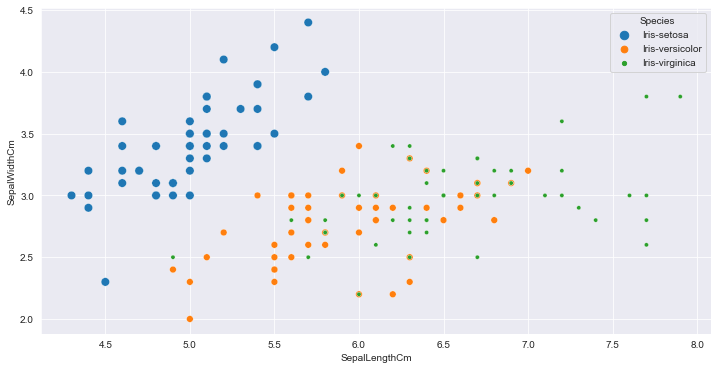

In [46]:
plt.rcParams["figure.figsize"] = (12, 6)
sns.scatterplot(
    x="SepalLengthCm",
    y="SepalWidthCm",
    hue="Species",
    size="Species",
    data=df_iris
)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

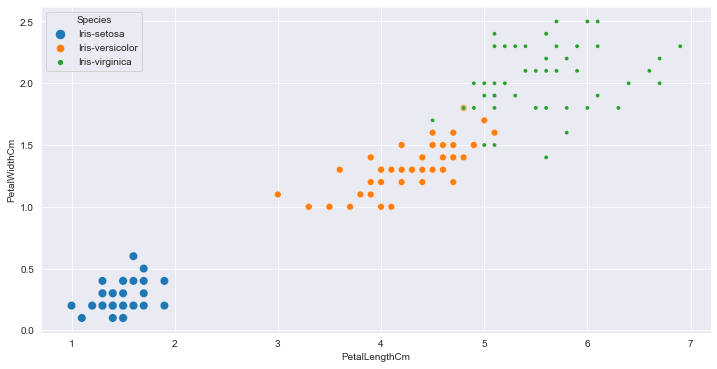

In [47]:
plt.rcParams["figure.figsize"] = (12,6)
sns.scatterplot(
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    size="Species",
    data=df_iris
)

<AxesSubplot:>

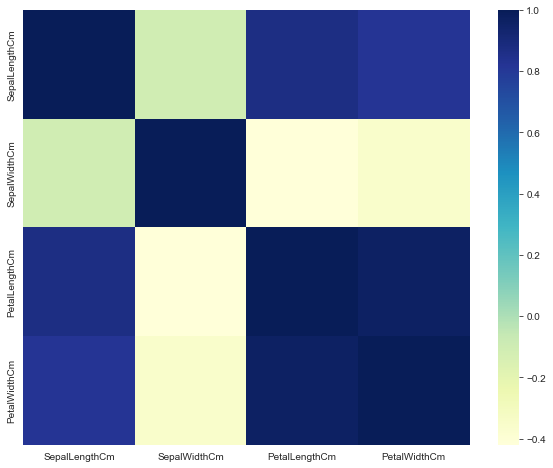

In [48]:
plt.rcParams["figure.figsize"] = (10,8)
sns.heatmap(df_iris.corr(), cmap="YlGnBu")

## Encoding Dependent Variable

In [49]:
df_iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [50]:
X = df_iris.drop(["Species"], axis=1).values
y = df_iris.Species.values

# Model

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [52]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [53]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
        
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier(eval_metric="mlogloss"),
    CatBoostClassifier(silent=True)  
    ]

In [54]:
row_index = 0
MLA_compare = pd.DataFrame()

for classifier in MLA:
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    classifier_accuracy_score = accuracy_score(y_test, y_pred)

    kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

    MLA_name = classifier.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
    MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

    print(MLA_name, "Done")
    row_index+=1

AdaBoostClassifier Done
BaggingClassifier Done
ExtraTreesClassifier Done
GradientBoostingClassifier Done
RandomForestClassifier Done
GaussianProcessClassifier Done
PassiveAggressiveClassifier Done
RidgeClassifierCV Done
SGDClassifier Done
Perceptron Done
BernoulliNB Done
GaussianNB Done
KNeighborsClassifier Done
SVC Done
NuSVC Done
DecisionTreeClassifier Done
ExtraTreeClassifier Done
LinearDiscriminantAnalysis Done
QuadraticDiscriminantAnalysis Done
XGBClassifier Done
CatBoostClassifier Done


In [55]:
MLA_compare = MLA_compare.sort_values(by="K-Fold Accuracy", ascending=False).reset_index(drop=True)[:15]
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,LinearDiscriminantAnalysis,100.000000,97.802198
1,NuSVC,100.000000,97.032967
2,QuadraticDiscriminantAnalysis,100.000000,97.032967
3,SVC,100.000000,97.032967
4,GaussianProcessClassifier,100.000000,96.263736
5,KNeighborsClassifier,100.000000,95.494505
6,AdaBoostClassifier,93.333333,94.835165
7,ExtraTreesClassifier,100.000000,94.835165
8,GradientBoostingClassifier,100.000000,94.835165
9,RandomForestClassifier,93.333333,94.835165


Text(0.5, 0, 'Algorithm Name')

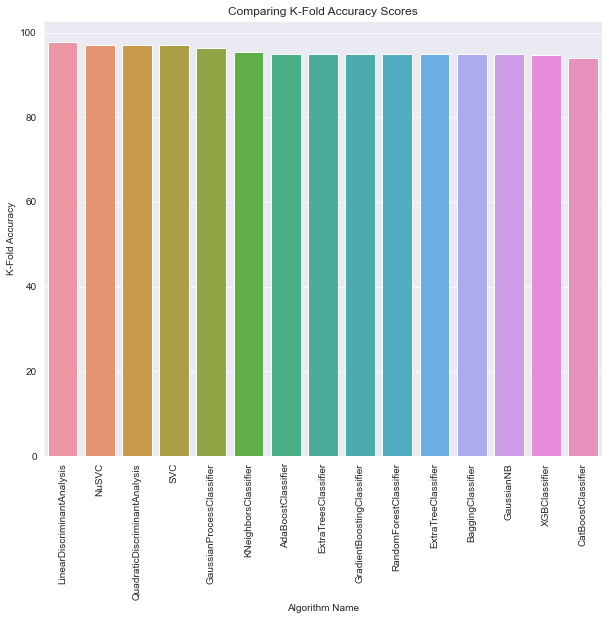

In [56]:
sns.barplot(x="MLA Name", y="K-Fold Accuracy", data=MLA_compare)
plt.xticks(rotation=90)
plt.title("Comparing K-Fold Accuracy Scores")
plt.xlabel("Algorithm Name")

# Using Linear Discriminant Analysis

In [57]:
lda_classifier = discriminant_analysis.LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)

y_pred = lda_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
kfold_accuracy = cross_val_score(estimator = lda_classifier, X = X_train, y = y_train, cv = 10).mean()

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

print(f"Classifier Accuracy Score : {round(accuracy, 4)*100}%", "\n")

print(f"Average K-Fold Accuracy Score : {round(kfold_accuracy, 4)*100}%", "\n")

print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred)}", "\n")

print(f"Classification Report\n{classification_report(y_test, y_pred)}")

Classifier Accuracy Score : 100.0% 

Average K-Fold Accuracy Score : 97.8% 

Confusion Matrix
[[3 0 0]
 [0 8 0]
 [0 0 4]] 

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



In [59]:
# Saving our Model
import pickle

filename = 'lda_model.pkl'

pickle.dump(lda_classifier, open(filename, 'wb'))

In [60]:
# Loading the saved model for prediction
lda_classifier = pickle.load(open(filename, 'rb'))
lda_classifier.predict([[2, 3.3, 1. , 2.5]])

array(['Iris-versicolor'], dtype='<U15')

In [62]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
